In [49]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm

## Question 6

In [40]:
np.random.seed(42)
def hypotheses(n):
    x_rand = np.random.uniform(0, 1, size=(n,2)) # generating random x
    y_rand = np.random.choice([0,1], size=(n,1)) # generating random y
    return x_rand , y_rand

def knn(x_data, y_data, test_data, v):
    pred = []
    
    for test in test_data:
        pos = np.argpartition(np.linalg.norm(test - x_data, ord=2, axis=1),v)[:v] # finding the position of the v nearest points to x
        
        y_mean = np.mean(y_data[pos]) # calculating the mean of y value for the v nearest point to test point
        
        if y_mean > 0.5:
            pred.append(1)
        elif y_mean < 0.5:
            pred.append(0)
        elif y_mean == 0.5:
            pred.append(np.random.choice([0,1]))
        else:
            raise Error("Mean should be between 0 and 1 (inclusive).")
    
    return np.array(pred)

def knn_plot(n, v):
    X, y = hypotheses(n)
    
    xx, yy = np.meshgrid(np.arange(0, 1, 0.002),
                         np.arange(0, 1, 0.002))

    test = np.c_[xx.ravel(), yy.ravel()]
    
    pred = knn(X, y, test, v) # predicting the y value of the test point
    pred_re = pred.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx, yy, pred_re, cmap=ListedColormap(['#21918C', '#FFFFFF']))
    plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(['#0000FF','#BFBF00']))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title(f'Hypothesis $h_{{S,{v}}}$ with $|S| = {n}$ and $v = {v}$')

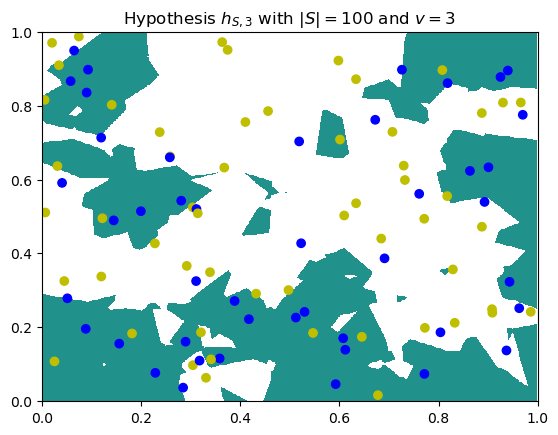

In [41]:
np.random.seed(42)
knn_plot(100, 3)
plt.savefig('Q6.png')

## Question 7

In [42]:
np.random.seed(42)
def ph_gen(x_data, y_data, n):
    X_ph = np.random.uniform(0, 1, size=(n,2))
    y_ph = np.empty((n,1))
    
    for i in range(n):
        coin = np.random.choice(['head','tail'], p=[0.8,0.2]) 
        
        if coin == 'head':
            y_ph[i] = knn(x_data, y_data, [X_ph[i]], 3)[0]
        elif coin == 'tail':
            y_ph[i] = np.random.choice([0,1])
            
    return X_ph, y_ph

In [43]:
np.random.seed(42)
k = np.arange(1,50,1)
error = []

# for every k-nn model
for i in range(len(k)):
    error_run = 0
    
    # run 100 times
    for run in tqdm(range(100)):
        X, y = hypotheses(100) # sample a h from pH
        X_train, y_train = ph_gen(X,y,4000) # generating 4000 training points
        X_test, y_test = ph_gen(X,y,1000) # generating 1000 test points
        pred = knn(X_train, y_train, X_test, k[i]) # making prediction 
        diff = abs(y_test - pred.reshape(y_test.shape)).sum() / 1000 # calculating the generalisation error for this run
        error_run += diff # summing up the error for the k
    
    error.append(error_run/100) # calculating the generalisation error for the k-nn model
        

100%|██████████| 100/100 [00:46<00:00,  2.13it/s]


In [44]:
np.random.seed(42)
plt.plot(k,error)
plt.title(f'Estimated Generalisation Error against $k$')
plt.xlabel(f'$k$')
plt.ylabel(f'Estimated Generalisation Error')
plt.savefig('Q7.png')

## Question 8

In [45]:
np.random.seed(42)
def optimal_k(m, k, run):
    m_list = [100] + [i for i in range(500,m+1,500)]
    k_list = np.arange(1,k+1,1)
    opt_k = []
    
    # for each number of training points (m)
    for m in tqdm(range(len(m_list))):
        min_k = []
        for _ in range(run):
            X, y = hypotheses(100) # sample a h from pH
            X_train, y_train = ph_gen(X,y,m_list[m]) # generating m training points
            X_test, y_test = ph_gen(X,y,1000) # generating 1000 test points

            min_error = 1e10
            k = 0
            for i in range(len(k_list)):
                pred = knn(X_train, y_train, X_test, k_list[i]) # making prediction
                diff = abs(y_test - pred.reshape(y_test.shape)).sum() / len(y_test) # caculating the error
                
                # finding the optimal k
                if diff < min_error:
                    min_error = diff
                    k = k_list[i]
            min_k.append(k)
            
        opt_k.append(np.mean(min_k)) # calculating the average value of the optimal k
    return m_list, opt_k

In [46]:
np.random.seed(42)
m1, k1 = optimal_k(4000, 49, 100)

100%|██████████| 9/9 [2:57:17<00:00, 1181.92s/it]  


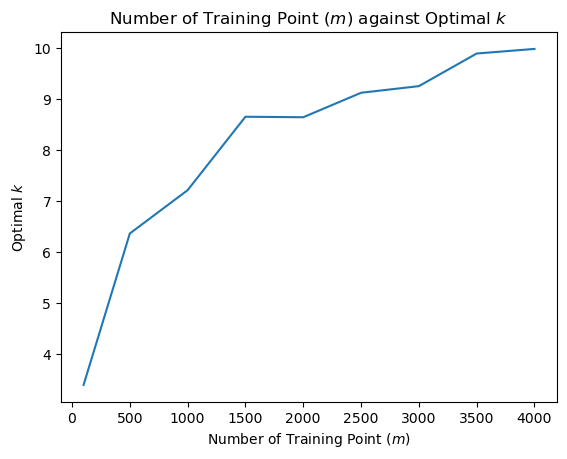

In [48]:
plt.plot(m1,k1)
plt.title(f'Number of Training Point ($m$) against Optimal $k$')
plt.xlabel(f'Number of Training Point ($m$)')
plt.ylabel(f'Optimal $k$')
plt.savefig('Q8.png')